In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('train.csv')
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [3]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


In [4]:
data.duplicated().sum()

np.int64(0)

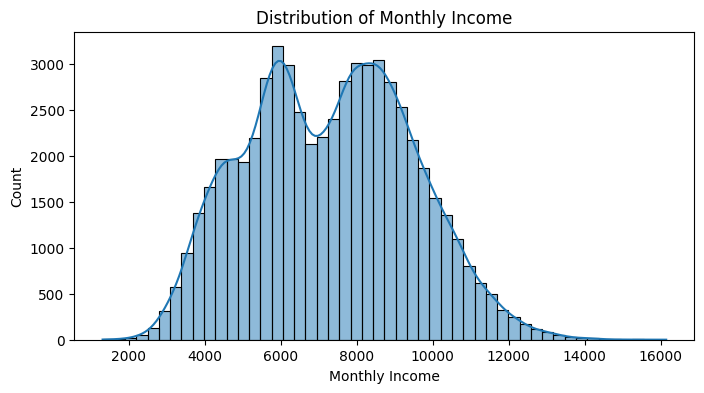

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(data['Monthly Income'], bins=50, kde=True)
plt.title('Distribution of Monthly Income')
plt.show()

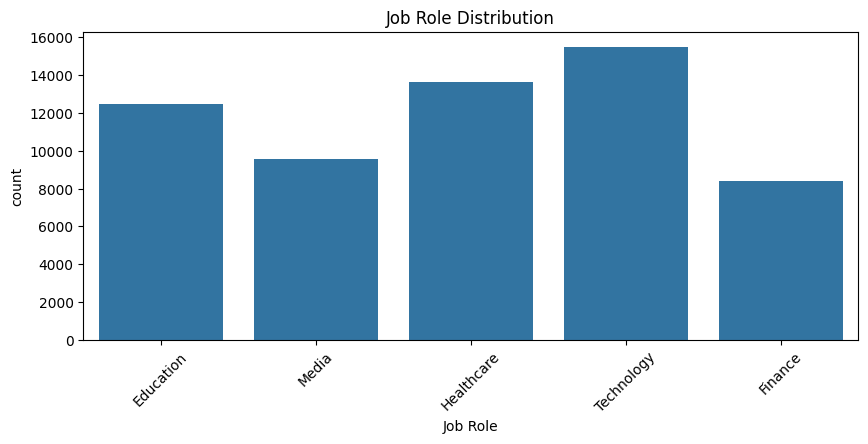

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(x='Job Role', data=data)
plt.xticks(rotation=45)
plt.title('Job Role Distribution')
plt.show()

In [7]:
drop_cols = ['Employee ID']
X = data.drop(columns=drop_cols + ['Monthly Income'])
y = data['Monthly Income']

In [8]:
X.head()

,Age,Gender,Years at Company,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,Excellent,Medium,Average,2,No,22,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,Poor,High,Low,3,No,21,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,Good,High,Low,0,No,11,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,Good,High,High,1,No,27,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,Fair,Very High,Average,0,Yes,71,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [9]:
y.head()

0    5390
1    5534
2    8159
3    3989
4    4821
Name: Monthly Income, dtype: int64

In [10]:
# Encode categorical variables
cat_cols = X.select_dtypes(include='object').columns
X_encoded = X.copy()
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Model Selection & Training

# Random Forest is a strong baseline for tabular data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 935.938427852349
R2 Score: 0.6508476002614589


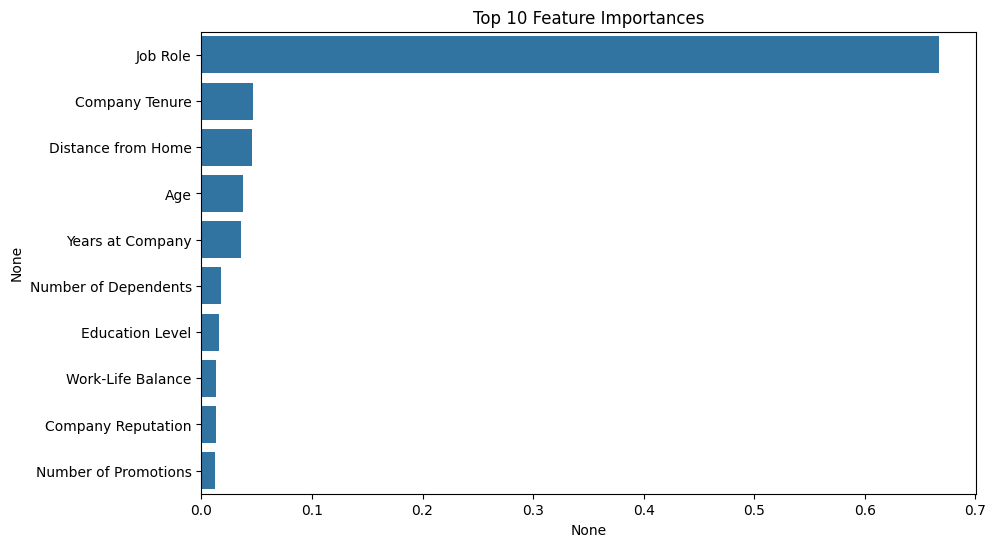

In [13]:
importances = model.feature_importances_
feat_names = X_encoded.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title('Top 10 Feature Importances')
plt.show()

In [14]:
sample_preds = model.predict(X_test[:5])
print("Sample predictions for Monthly Income:", sample_preds)

Sample predictions for Monthly Income: [4421.44 8124.65 7928.4  4231.54 9493.57]


In [15]:
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # 1. Data Exploration & Visualization
# import matplotlib.pyplot as plt

# # Check for missing values
# print("Missing values per column:\n", data.isnull().sum())

# # Visualize target distribution
# plt.figure(figsize=(8,4))
# sns.histplot(data['Monthly Income'], bins=50, kde=True)
# plt.title('Distribution of Monthly Income')
# plt.show()

# # Visualize categorical features
# plt.figure(figsize=(10,4))
# sns.countplot(x='Job Role', data=data)
# plt.xticks(rotation=45)
# plt.title('Job Role Distribution')
# plt.show()

# # 2. Data Preprocessing

# # Drop columns not useful for prediction
# drop_cols = ['Employee ID']
# X = data.drop(columns=drop_cols + ['Monthly Income'])
# y = data['Monthly Income']

# # Encode categorical variables
# cat_cols = X.select_dtypes(include='object').columns
# X_encoded = X.copy()
# for col in cat_cols:
#     le = LabelEncoder()
#     X_encoded[col] = le.fit_transform(X_encoded[col])

# # Feature scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_encoded)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # 3. Model Selection & Training

# # Random Forest is a strong baseline for tabular data
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # 4. Evaluation
# y_pred = model.predict(X_test)
# print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
# print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
# print("R2 Score:", r2_score(y_test, y_pred))

# # 5. Feature Importance Plot
# importances = model.feature_importances_
# feat_names = X_encoded.columns
# feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

# plt.figure(figsize=(10,6))
# sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
# plt.title('Top 10 Feature Importances')
# plt.show()

# # 6. Making Predictions
# # Example: Predict for the first 5 rows of the test set
# sample_preds = model.predict(X_test[:5])
# print("Sample predictions for Monthly Income:", sample_preds)

In [16]:
# Prepare input features for prediction
def predict_monthly_income(job_role, age, years_at_company):
    # Create a DataFrame with the required columns
    input_df = pd.DataFrame({
        'Age': [age],
        'Job Role': [job_role],
        'Years at Company': [years_at_company]
    })

    # Add missing columns with default values from X
    for col in X.columns:
        if col not in input_df.columns:
            # Use the most frequent value for categorical, median for numeric
            if X[col].dtype == 'object':
                input_df[col] = X[col].mode()[0]
            else:
                input_df[col] = X[col].median()

    # Reorder columns to match X
    input_df = input_df[X.columns]

    # Encode categorical variables
    for col in cat_cols:
        le = LabelEncoder()
        le.fit(X[col])
        input_df[col] = le.transform(input_df[col])


    # Scale features
    input_scaled = scaler.transform(input_df)

    # Predict
    pred_income = model.predict(input_scaled)
    return pred_income[0]

# Example usage:
predicted_income = predict_monthly_income('Education', 35, 7)
print("Predicted Monthly Income:", predicted_income)

Predicted Monthly Income: 4588.65


In [17]:
import joblib

# Save the trained model, scaler, and column info
joblib.dump(model, 'monthly_income_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(list(X.columns), 'columns.pkl')
joblib.dump(cat_cols.tolist(), 'cat_cols.pkl')

['cat_cols.pkl']

In [18]:
# import joblib
# from flask import Flask, request, jsonify

# # Save the trained model, scaler, and columns
# joblib.dump(model, 'rf_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(list(X.columns), 'columns.pkl')
# joblib.dump(cat_cols.tolist(), 'cat_cols.pkl')

# # Flask app for deployment
# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Load model and preprocessing objects
#     model = joblib.load('rf_model.pkl')
#     scaler = joblib.load('scaler.pkl')
#     columns = joblib.load('columns.pkl')
#     cat_cols = joblib.load('cat_cols.pkl')
    
#     # Get input data
#     input_json = request.get_json()
#     input_df = pd.DataFrame([input_json], columns=columns)
    
#     # Fill missing columns if any
#     for col in columns:
#         if col not in input_df.columns:
#             if col in cat_cols:
#                 input_df[col] = X[col].mode()[0]
#             else:
#                 input_df[col] = X[col].median()
    
#     # Encode categorical variables
#     for col in cat_cols:
#         le = LabelEncoder()
#         le.fit(X[col])
#         input_df[col] = le.transform(input_df[col])
    
#     # Scale features
#     input_scaled = scaler.transform(input_df)
    
#     # Predict
#     pred = model.predict(input_scaled)[0]
#     return jsonify({'predicted_monthly_income': float(pred)})

# if __name__ == '__main__':
#     app.run(debug=True)

In [19]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load model and preprocessing objects
model = joblib.load('monthly_income_model.pkl')
scaler = joblib.load('scaler.pkl')
columns = joblib.load('columns.pkl')
cat_cols = joblib.load('cat_cols.pkl')

# For categorical encoding, we need the original data for mapping
data = pd.read_csv('train.csv')
X = data.drop(columns=['Employee ID', 'Monthly Income'])

st.title("Employee Monthly Income Prediction")

st.write("Enter employee details to predict the monthly income:")

# Collect user input for all features in X
input_data = {}
for col in columns:
    if X[col].dtype == 'object':
        options = X[col].unique().tolist()
        input_data[col] = st.selectbox(col, options)
    else:
        min_val = int(X[col].min())
        max_val = int(X[col].max())
        mean_val = int(X[col].median())
        input_data[col] = st.number_input(col, min_value=min_val, max_value=max_val, value=mean_val)

if st.button("Predict"):
    # Prepare input DataFrame
    input_df = pd.DataFrame([input_data], columns=columns)

    # Encode categorical variables
    for col in cat_cols:
        le = LabelEncoder()
        le.fit(X[col])
        input_df[col] = le.transform(input_df[col])

    # Scale features
    input_scaled = scaler.transform(input_df)

    # Predict
    pred_income = model.predict(input_scaled)[0]
    st.success(f"Predicted Monthly Income: {pred_income:.2f}")

2025-06-04 20:22:53.059 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:55.886 
  command:

    streamlit run C:\Users\Kalindu\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-04 20:22:55.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:55.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:55.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:55.922 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:55.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:55.941 Th

In [20]:
# import streamlit as st

# # Streamlit app for predicting Monthly Income
# st.title("Employee Monthly Income Prediction")

# st.write("Enter employee details to predict the monthly income:")

# # Collect user input for all features in X
# input_data = {}
# for col in X.columns:
#     if X[col].dtype == 'object':
#         options = X[col].unique().tolist()
#         input_data[col] = st.selectbox(col, options)
#     else:
#         min_val = int(X[col].min())
#         max_val = int(X[col].max())
#         mean_val = int(X[col].median())
#         input_data[col] = st.number_input(col, min_value=min_val, max_value=max_val, value=mean_val)

# if st.button("Predict"):
#     # Prepare input DataFrame
#     input_df = pd.DataFrame([input_data], columns=X.columns)

#     # Encode categorical variables
#     for col in cat_cols:
#         le = LabelEncoder()
#         le.fit(X[col])
#         input_df[col] = le.transform(input_df[col])

#     # Scale features
#     input_scaled = scaler.transform(input_df)

#     # Predict
#     pred_income = model.predict(input_scaled)[0]
#     st.success(f"Predicted Monthly Income: {pred_income:.2f}")

In [21]:
import streamlit as st
import pandas as pd
import joblib

# Load model and preprocessing objects
model = joblib.load('monthly_income_model.pkl')
scaler = joblib.load('scaler.pkl')
le = joblib.load('label_encoder.pkl')

#
important_features = ['Job Role', 'Company Tenure', 'Distance from Home', 'Age', 'Years at Company']

# Identify categorical columns among the important features
cat_cols_imp = [col for col in important_features if X[col].dtype == 'object']

st.title("Employee Monthly Income Prediction (Top Features)")

# Collect user input for important features
input_data = {}
for col in important_features:
    if col in cat_cols_imp:
        options = X[col].unique().tolist()
        input_data[col] = st.selectbox(col, options)
    else:
        min_val = int(X[col].min())
        max_val = int(X[col].max())
        mean_val = int(X[col].median())
        input_data[col] = st.number_input(col, min_value=min_val, max_value=max_val, value=mean_val)

if st.button("Predict"):
    input_df = pd.DataFrame([input_data], columns=important_features)

    # Encode categorical variables
    for col in cat_cols_imp:
        le.fit(X[col])
        input_df[col] = le.transform(input_df[col])

    # Scale features
    input_scaled = scaler.transform(input_df.reindex(columns=X.columns, fill_value=0))[:, [X.columns.get_loc(f) for f in important_features]]

    # Predict
    pred_income = model.predict(input_scaled)[0]
    st.success(f"Predicted Monthly Income: {pred_income:.2f}")


2025-06-04 20:22:58.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:58.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:58.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:58.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:58.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:58.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:58.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 20:22:58.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [22]:
data['Job Level'].unique()

array(['Mid', 'Senior', 'Entry'], dtype=object)